In [1]:
import numpy as np

In [24]:
def get_confint(pop_mean, pop_range, sample_szie):
    sample = np.random.uniform(pop_mean - pop_range,
                          pop_mean + pop_range,
                          size = sample_size)

    stderr = np.std(sample, ddof=1) / np.sqrt(sample_size)

    r = 1.96 * stderr
    sample_mean = np.mean(sample)

    return (sample_mean - r, sample_mean + r)

get_confint(3, 4, 10)

(1.7122441798662547, 4.884496457172969)

In [72]:
sample_size = 10 # 91% use t distribution instead of normal distribution
sample_size = 50 # 94%
sample_size = 500 # 95% usually several hundreds
pop_mean = 3
pop_range = 4

catched = 0
iterations = 10000

for i in range(iterations):
    confint = get_confint(pop_mean, pop_range, sample_size)
    if confint[0] < pop_mean < confint[1]:
        catched += 1

catched / iterations # around 91%, but 1.96 should garantee us 95% probability, it's due to small sample size

0.9512

confidence interval: beyond 1.96

In [74]:
import scipy.stats

In [75]:
scipy.stats.norm.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

-2.5705818366147395 2.5705818366147395


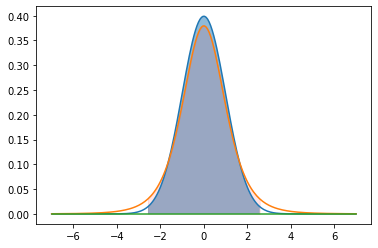

In [97]:
conf_level = 0.95 # 1.959...,  2.57 for t distr
# conf_level = 0.99 # 2.967

df = 5

left, right = scipy.stats.norm.interval(conf_level)
left, right = scipy.stats.t.interval(conf_level, df=df)
x = np.linspace(-7, 7, 200)
plt.plot(x, scipy.stats.norm.pdf(x))
plt.plot(x, scipy.stats.t.pdf(x, df = df))
x_int = np.linspace(left, right, 200)
plt.fill_between(x_int, scipy.stats.norm.pdf(x_int), alpha=0.5) # probability 95%
plt.fill_between(x_int, scipy.stats.t.pdf(x_int, df=df), alpha=0.1, color='red') # probability 95%
plt.plot(x, np.zeros_like(x))
print(left, right)

In [126]:
def get_confint_t(pop_mean, pop_range, sample_szie, conf_level):
    sample = np.random.uniform(pop_mean - pop_range,
                          pop_mean + pop_range,
                          size = sample_size)

    stderr = np.std(sample, ddof=1) / np.sqrt(sample_size)

    df = sample_size - 1
    
    left, right = scipy.stats.t.interval(conf_level, df=df)
    
    r = right * stderr
    
    sample_mean = np.mean(sample)

    return (sample_mean - r, sample_mean + r)

pop_mean = 3
pop_range = 4
sample_size = 20 # 94.6..%
sample_size = 5 # 93%, 
"""
This is due to the fact that even t distribution is just an approximation. 
And for very small samples and arbitrary distribution of our population, in this case uniform distribution. 
The t distribution does not follow the actual distribution of the mean
"""
conf_level = 0.95

catched = 0
iterations = 10000

for i in range(iterations):
    confint = get_confint_t(pop_mean, pop_range, sample_szie, conf_level)

    if confint[0] < pop_mean < confint[1]:
        catched += 1
    
catched

9360

Consider a sample (1, 2, 2, 4, 3, 2, 5). Find 99% confidence interval for corresponding population mean using normal approximation. Enter the right endpoint of the interval as numeric value with 3 digits after the decimal point.

In [136]:
sample = [1, 2, 2, 4, 3, 2, 5]
sample_size = len(sample)
stderr = np.std(sample, ddof=1) / np.sqrt(sample_size)

sample_mean = np.mean(sample)

left, right = scipy.stats.norm.interval(0.99)

r = right * stderr

sample_mean + r

4.057942679844338

F​or the same sample, find 99% confidence interval using t-distribution instead of normal distribution. (Thus we take into account that number of samples is rather small and normal approximation may be incorrect and produce too small confidence intervals.) Enter the right endpoint of this interval with 3 digits after the decimal point.

In [138]:
df = sample_size - 1
left, right = scipy.stats.t.interval(0.99, df=df)

r = right * stderr

sample_mean + r

4.648230435815615